# Object detection tutorial

This tutorial shows the different options for evaluating an object detection task with Metrics Reloaded.

### Set up the environment

Install the relevant packages from the MetricsReloaded repository.

In [1]:
#! pip install -q git+https://github.com/Project-MONAI/MetricsReloaded
#! cd ../.. ; pip install -e .
#! pip install matplotlib

### Set up imports

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import nibabel as nib

### Load in the data

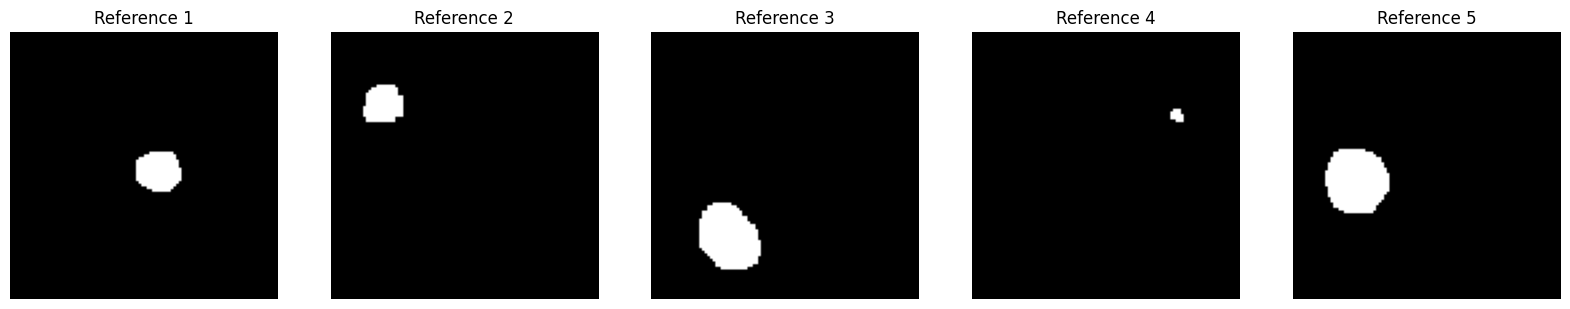

(np.float64(-0.5), np.float64(99.5), np.float64(99.5), np.float64(-0.5))

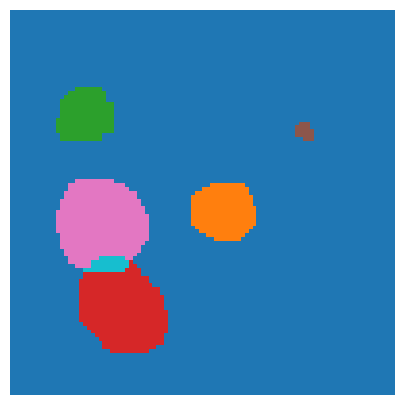

In [3]:
ref_list = []
for i in range(5):
    ref = nib.load(f'refs/ref{i+1}.nii.gz').get_fdata().squeeze()  # load in the reference
    ref_list.append(ref)


# visualise all the references
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
for i, ax in enumerate(axs):
    ax.imshow(ref_list[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Reference {i+1}')
plt.show()

# visualise the overlay of all the references
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
overlay = np.zeros_like(ref_list[0])
for i in range(5):
    overlay += ref_list[i] * (i+1)
ax.imshow(overlay, cmap='tab10')
ax.axis('off')

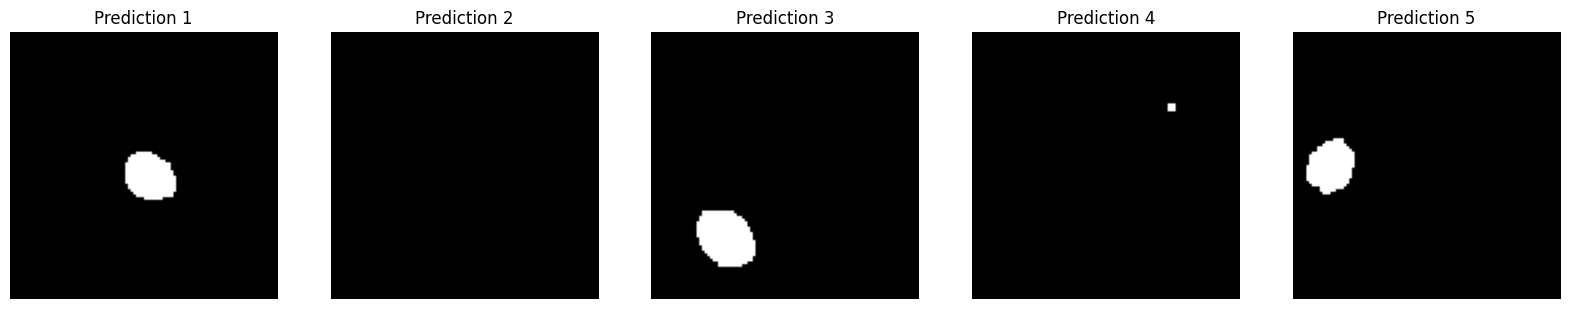

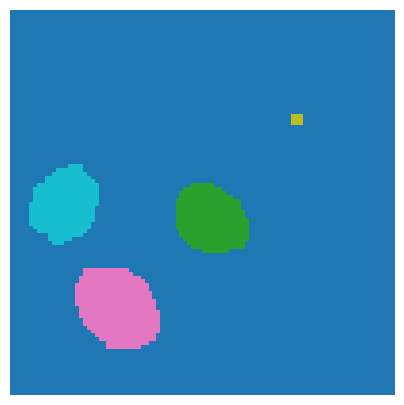

In [4]:
# load in the labels (preds)
pred_list = []
for i in range(5):
    pred = nib.load(f'preds/pred{i+1}.nii.gz').get_fdata().squeeze()  # load in the prediction
    pred_list.append(pred)

# visualise all the predictions separately
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
for i, ax in enumerate(axs):
    ax.imshow(pred_list[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Prediction {i+1}')

# visualise the overlay of all the predictions
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
overlay = np.zeros_like(pred_list[0])
for i in range(5):
    overlay += pred_list[i] * (i+1)
ax.imshow(overlay, cmap='tab10')
ax.axis('off')
plt.show()

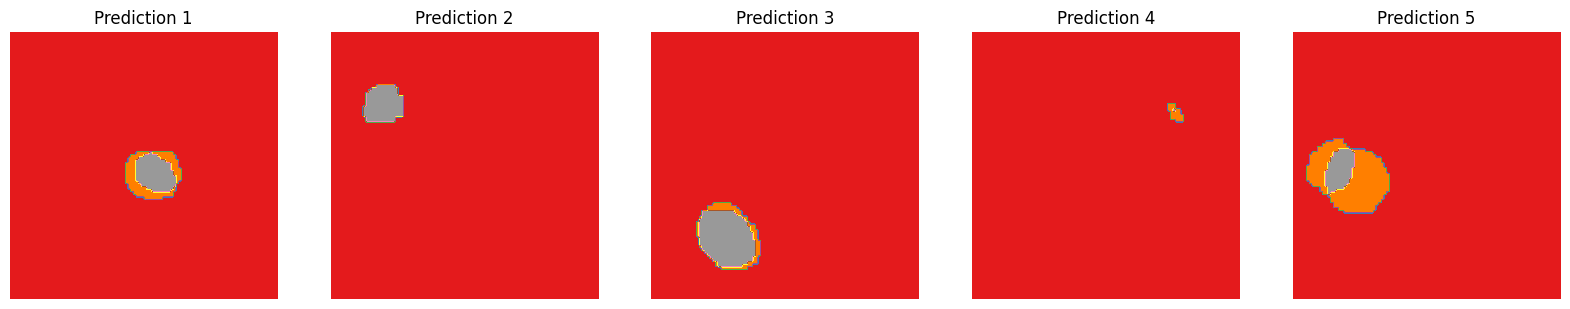

In [5]:
# visualise the intersections of the predictions and the references
fig, axs = plt.subplots(1,5, figsize=(20, 5))
for i, ax in enumerate(axs):
    ax.imshow(ref_list[i] + pred_list[i], cmap='Set1')
    ax.axis('off')
    ax.set_title(f'Prediction {i+1}')

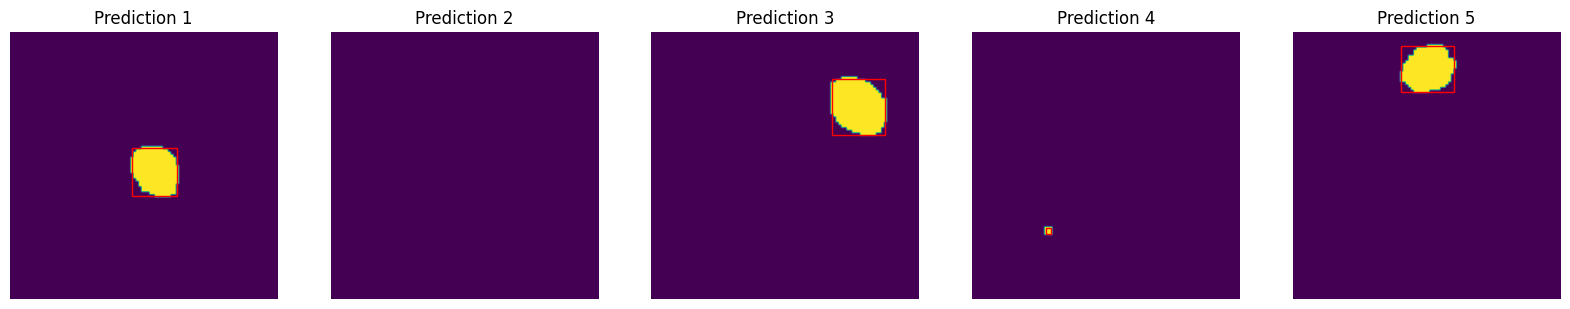

In [6]:
# generate bounding boxes from the predictions
import matplotlib.patches as patches
from MetricsReloaded.utility.utils import compute_box

pred_boxes = []
for pred in pred_list:
    if pred.sum() == 0:
        pred_boxes.append(np.array([0, 0, 0, 0]))
    else:
        pred_boxes.append(compute_box(pred))

ref_boxes = []
for ref in ref_list:
    ref_boxes.append(compute_box(ref))
    
# visualise the bounding boxes
fig, axs = plt.subplots(1,5, figsize=(20, 5))
for i, ax in enumerate(axs):
    ax.imshow(pred_list[i].T)
    ax.axis('off')
    ax.set_title(f'Prediction {i+1}')

    if pred_list[i].sum() != 0:
        bbox = pred_boxes[i]
        xmin, ymin, xmax, ymax = bbox
        # Create a Rectangle patch
        rect = patches.Rectangle((xmin, ymin),
                                xmax - xmin,
                                ymax - ymin,
                                linewidth=1,
                                edgecolor='r',
                                facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

plt.show()


In [7]:
from MetricsReloaded.processes.overall_process import ProcessEvaluation as PE
from MetricsReloaded.utility.utils import MorphologyOps
list_ref, _, _ = MorphologyOps(ref_list, connectivity=6).list_foreground_component()
list_pred, _, _ = MorphologyOps(pred_list, connectivity=6).list_foreground_component()

In [15]:
data = {}
data['pred_loc'] = [pred_boxes]
data['ref_loc'] = [ref_boxes]
data['pred_prob'] = [[0,1],[0,1],[0,1],[0,1],[0,1]]
data['ref_class'] = [[1] * 5]
data['pred_class'] = [[1] * 5]

data['list_values'] = [1]

pe = PE(data,
        'ObD',
        measures_pcc=['fbeta',
                      'numb_pred',
                      'numb_tp',
                      'numb_fp',
                      'numb_fn',
                      'numb_ref'],
        localization='box_iou',
        assignment='greedy_matching',
        pixdim=(100,100),
        ignore_missing=False
        )

pred_arr:  [1 1 1 1 1] lab:  1
self.pred_loc[case] [array([45, 43, 62, 61]), array([0, 0, 0, 0]), array([67, 17, 87, 38]), array([27, 73, 29, 75]), array([40,  5, 60, 22])]
self.ref_loc[case] [array([45, 47, 59, 63]), array([20, 12, 33, 26]), array([64, 18, 88, 40]), array([29, 74, 33, 78]), array([44, 12, 67, 35])]
ind_pred[0] [0 1 2 3 4]


TypeError: list indices must be integers or slices, not tuple

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [39]:
ref_boxes

[array([45, 47, 59, 63]),
 array([20, 12, 33, 26]),
 array([64, 18, 88, 40]),
 array([29, 74, 33, 78]),
 array([44, 12, 67, 35])]

In [32]:
pred_boxes  

[array([45, 43, 62, 61]),
 array([0, 0, 0, 0]),
 array([67, 17, 87, 38]),
 array([27, 73, 29, 75]),
 array([40,  5, 60, 22])]